---
title: "Moroccan Power Consumption - Tetouan City"
author: "Zakaria El-Aoufi"
date: "`r Sys.Date()`"
output: html_document
---

# Introduction

Welcome to the **notebook** version of Tetouan city power consumption analysis, created by Zakaria El-Aoufi. 

In this notebook, we will explore the electricity consumption behavior of Tetouan city residents. The data represents three distinct zones, each reflecting power consumption measured in kilowatt-hours (kWh). Through this notebook, I aim to provide a comprehensive analysis of power consumption patterns.

This notebook comprises two essential parts:

1. **Exploratory Data Analysis (EDA):** A detailed exploration of the dataset to uncover patterns, trends, and anomalies.
2. **Machine Learning Regression Model:** A forecasting model to predict future consumption based on specific variables outlined below.

# Dataset Variables

Here are the key variables included in the dataset:

- **DateTime:** Timestamps recorded at 10-minute intervals.
- **Temperature:** Weather temperature in Tetouan city.
- **Humidity:** Weather humidity in Tetouan city.
- **Wind Speed:** Wind speed recorded in Tetouan city.
- **General Diffuse Flows:** General diffuse radiation flows.
- **Diffuse Flows:** Specific diffuse radiation flows.
- **Zone 1 Power Consumption (Target):** Power consumption in Zone 1 (kWh).
- **Zone 2 Power Consumption (Target):** Power consumption in Zone 2 (kWh).
- **Zone 3 Power Consumption (Target):** Power consumption in Zone 3 (kWh).

# Goals

The primary objectives of this analysis are:

- To understand the consumption behavior across different zones.
- To identify factors influencing power consumption.
- To build a machine learning regression model for forecasting future power consumption.

Let's dive into the data analysis and modeling process.

# Setup my Environment

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

## Load data

In [121]:
power_consumption = pd.read_csv('./data/power_consumption.csv')
power_consumption.head()

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1,Zone 2,Zone 3
0,01-01-2017 00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,01-01-2017 00:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,01-01-2017 00:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,01-01-2017 00:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,01-01-2017 00:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964
...,...,...,...,...,...,...,...,...,...
52411,12/30/2017 23:10,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212
52412,12/30/2017 23:20,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152
52413,12/30/2017 23:30,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259
52414,12/30/2017 23:40,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504


In [149]:
power_consumption.describe()

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1,Zone 2,Zone 3,Zone 1 (MWh),Zone 2 (MWh),Zone 3 (MWh)
count,52416,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000
mean,2017-07-01 23:55:00,18.810024,68.259518,1.959489,182.696614,75.028022,32344.970564,21042.509082,17835.406218,32.344971,21.042509,17.835406
min,2017-01-01 00:00:00,3.247000,11.340000,0.050000,0.004000,0.011000,13895.696200,8560.081466,5935.174070,13.895696,8.560081,5.935174
25%,2017-04-01 23:57:30,14.410000,58.310000,0.078000,0.062000,0.122000,26310.668692,16980.766032,13129.326630,26.310669,16.980766,13.129327
50%,2017-07-01 23:55:00,18.780000,69.860000,0.086000,5.035500,4.456000,32265.920340,20823.168405,16415.117470,32.265920,20.823168,16.415117
75%,2017-09-30 23:52:30,22.890000,81.400000,4.915000,319.600000,101.000000,37309.018185,24713.717520,21624.100420,37.309018,24.713718,21.624100
max,2017-12-30 23:50:00,40.010000,94.800000,6.483000,1163.000000,936.000000,52204.395120,37408.860760,47598.326360,52.204395,37.408861,47.598326
std,NaN,5.815476,15.551177,2.348862,264.400960,124.210949,7130.562564,5201.465892,6622.165099,7.130563,5.201466,6.622165


In [150]:
power_consumption.isnull().sum()

DateTime                 0
Temperature              0
Humidity                 0
Wind Speed               0
general diffuse flows    0
diffuse flows            0
Zone 1                   0
Zone 2                   0
Zone 3                   0
Zone 1 (MWh)             0
Zone 2 (MWh)             0
Zone 3 (MWh)             0
dtype: int64

# Data Manipulation

## Fix columns Names and Type 

In [122]:
# fix data columns names by removing leading spase 
power_consumption.columns = power_consumption.columns.str.strip()
# fix datatime column to datetime type
power_consumption['DateTime'] = pd.to_datetime(power_consumption['DateTime'], format='mixed')

In [123]:
# Transform power consumption from kWh to MWh for better visualization
power_consumption[['Zone 1 (MWh)', 'Zone 2 (MWh)', 'Zone 3 (MWh)']] = power_consumption[['Zone 1', 'Zone 2', 'Zone 3']] / 1000

## Duplicate Detection

In [124]:
dlen1 = power_consumption.shape[0]
power_consumption = power_consumption.drop_duplicates(keep='first')
dlen2 = power_consumption.shape[0]
print(f'{dlen1 - dlen2} rows removed')

0 rows removed


## Generate Hourly, Daily, Weekly and Monthly data

In [125]:
data = power_consumption.copy()
data = data.set_index('DateTime')

In [126]:
day_names = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

month_names = {
        1: 'January',
        2: 'February',
        3: 'March',
        4: 'April',
        5: 'May',
        6: 'June',
        7: 'July',
        8: 'August',
        9: 'September',
        10: 'October',
        11: 'November',
        12: 'December'
}

### Hourly Consumption

In [127]:
hourly_consumption = data.resample('h').sum()
hourly_consumption.reset_index(inplace=True)

hourly_consumption['hour'] = hourly_consumption['DateTime'].dt.hour
hourly_consumption['day'] = hourly_consumption['DateTime'].dt.day
hourly_consumption['month'] = hourly_consumption['DateTime'].dt.month

In [152]:
hourly_consumption.head()

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1,Zone 2,Zone 3,Zone 1 (MWh),Zone 2 (MWh),Zone 3 (MWh),hour,day,month
0,2017-01-01 00:00:00,37.181,450.4,0.491,0.381,0.593,175187.84810,108160.48632,115512.28916,175.187848,108.160486,115.512289,0,1,1
1,2017-01-01 01:00:00,33.293,465.5,0.492,0.341,0.675,147943.29114,96470.51672,102257.34940,147.943291,96.470517,102.257349,1,1,1
2,2017-01-01 02:00:00,30.326,473.6,0.494,0.378,0.775,132498.22784,85984.19453,94056.86747,132.498228,85.984195,94.056867,2,1,1
3,2017-01-01 03:00:00,30.026,462.5,0.497,0.359,0.846,124866.83544,79316.71732,89303.13253,124.866835,79.316717,89.303133,3,1,1
4,2017-01-01 04:00:00,30.586,444.3,0.494,0.348,0.737,122855.69620,77529.48328,85902.65060,122.855696,77.529483,85.902651,4,1,1


### Daily Consumption

In [128]:
daily_consumption = data.resample('D').mean()
daily_consumption.reset_index(inplace=True)

daily_consumption['day'] = daily_consumption['DateTime'].dt.day
daily_consumption['month'] = daily_consumption['DateTime'].dt.month
daily_consumption['Weekday'] = daily_consumption['DateTime'].dt.weekday
daily_consumption["IsWeekend"] = daily_consumption['Weekday'] >= 5

# Add a new column for month names
daily_consumption['Day Name'] = daily_consumption['Weekday'].map(day_names)

In [ ]:
daily_consumption.head()

### Monthly Consumption

In [130]:
monthly_data = data.resample("ME").mean()
monthly_data.reset_index(inplace=True)

monthly_data['month'] = monthly_data['DateTime'].dt.month

# Add a new column for month names
monthly_data['Month Name'] = monthly_data['month'].map(month_names)

In [ ]:
monthly_data.head()

# Data Visualization

## Hourly Power Consumption

In [131]:
def plot_hourly_consumption(data, month, day):
    # Filter data for the specified day
    day_data = data[(data['month'] == month) & (data['day'] == day)]
    
    # Create the line plot
    plt.figure(figsize=(14, 8))
    sns.lineplot(
        x='hour', 
        y='Zone 1 (MWh)', 
        data=day_data, 
        label='Zone 1 (MWh)', 
        color='blue', 
        marker='o'
    )
    sns.lineplot(
        x='hour', 
        y='Zone 2 (MWh)', 
        data=day_data, 
        label='Zone 2 (MWh)', 
        color='green', 
        marker='o'
    )
    sns.lineplot(
        x='hour', 
        y='Zone 3 (MWh)', 
        data=day_data, 
        label='Zone 3 (MWh)', 
        color='red', 
        marker='o'
    )
    
    # Add title and labels
    plt.title(
        f'Hourly Power Consumption in MWh for 2017-{month}-{day}', 
        fontsize=16, 
        fontweight='bold', 
        pad=20
    )
    plt.xlabel('Hour of the Day', fontsize=14, fontweight='bold')
    plt.ylabel('Megawatt-Hours (MWh)', fontsize=14, fontweight='bold')
    
    # Set x-axis ticks to show all hours
    plt.xticks(range(0, 24))
    
    # Add grid lines for better readability
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Add legend
    plt.legend(title='Zone', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Adjust layout to prevent overlapping
    plt.tight_layout()
    
    # Show the plot
    plt.show()

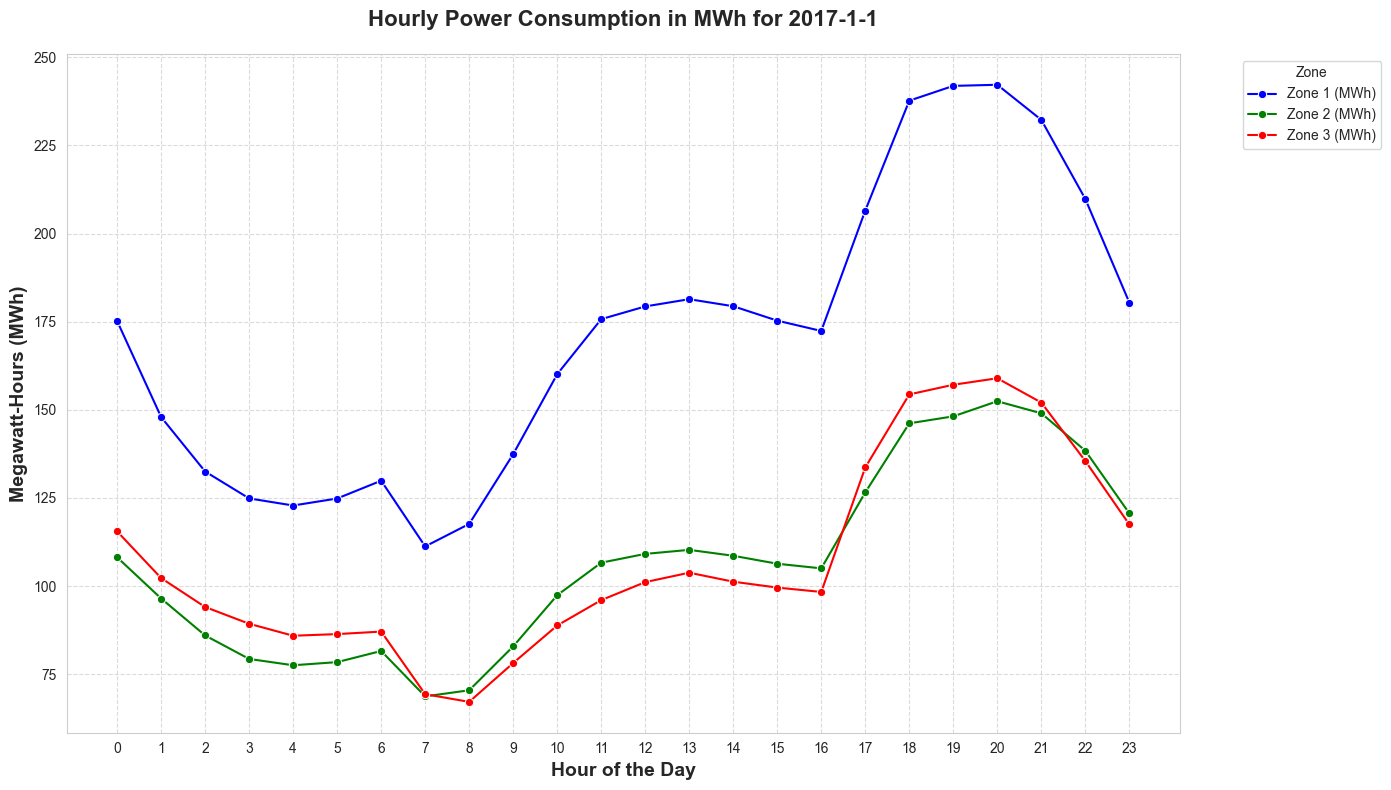

In [132]:
plot_hourly_consumption(hourly_consumption, month=1, day=1)

## Plot Electrical Consumption for WeekDays 

In [133]:
data_by_weekdays = daily_consumption.groupby(['month','Weekday','Day Name',])[['Zone 1 (MWh)', 'Zone 2 (MWh)', 'Zone 3 (MWh)']].sum()
data_by_weekdays = data_by_weekdays.reset_index()

In [134]:
data_by_weekdays.head()

,month,Weekday,Day Name,Zone 1 (MWh),Zone 2 (MWh),Zone 3 (MWh)
0,1,0,Monday,154.026414,97.016388,88.401365
1,1,1,Tuesday,157.434599,97.473860,88.658353
2,1,2,Wednesday,126.911772,80.053419,71.213735
3,1,3,Thursday,127.713713,80.843592,71.472691
4,1,4,Friday,126.268228,80.484473,69.888353
...,...,...,...,...,...,...
79,12,2,Wednesday,118.606084,97.532244,44.461985
80,12,3,Thursday,118.768483,97.765086,43.709364
81,12,4,Friday,143.527165,117.943720,54.576511
82,12,5,Saturday,142.791677,116.459088,55.853541


In [135]:
def plot_zones_by_month(data, month):
    # Filter data for the specified month
    month_data = data[data['month'] == month]
    
    # Melt the DataFrame to long format for easier plotting
    melted_data = month_data.melt(
        id_vars=['Weekday', 'Day Name'], 
        value_vars=['Zone 1 (MWh)', 'Zone 2 (MWh)', 'Zone 3 (MWh)'], 
        var_name='Zone', 
        value_name='Consumption (MWh)'
    )
    
    # Create the bar plot
    plt.figure(figsize=(14, 8))
    sns.barplot(
        x='Day Name', 
        y='Consumption (MWh)', 
        hue='Zone', 
        data=melted_data, 
        palette='Blues', 
        ci=None  # Disable confidence intervals
    )
    
    # Add title and labels
    plt.title(
        f'Power Consumption by Zone in Tetouan (2017) - {month_names[month]}', 
        fontsize=16, 
        fontweight='bold', 
        pad=20
    )
    plt.xlabel('Day of the Week', fontsize=14, fontweight='bold')
    plt.ylabel('Megawatt-Hours (MWh)', fontsize=14, fontweight='bold')
    
    # Add grid lines for better readability
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    
    # Add legend
    plt.legend(title='Zone', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Adjust layout to prevent overlapping
    plt.tight_layout()
    
    # Show the plot
    plt.show()

C:\Users\zakar\AppData\Local\Temp\ipykernel_612\1571912089.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


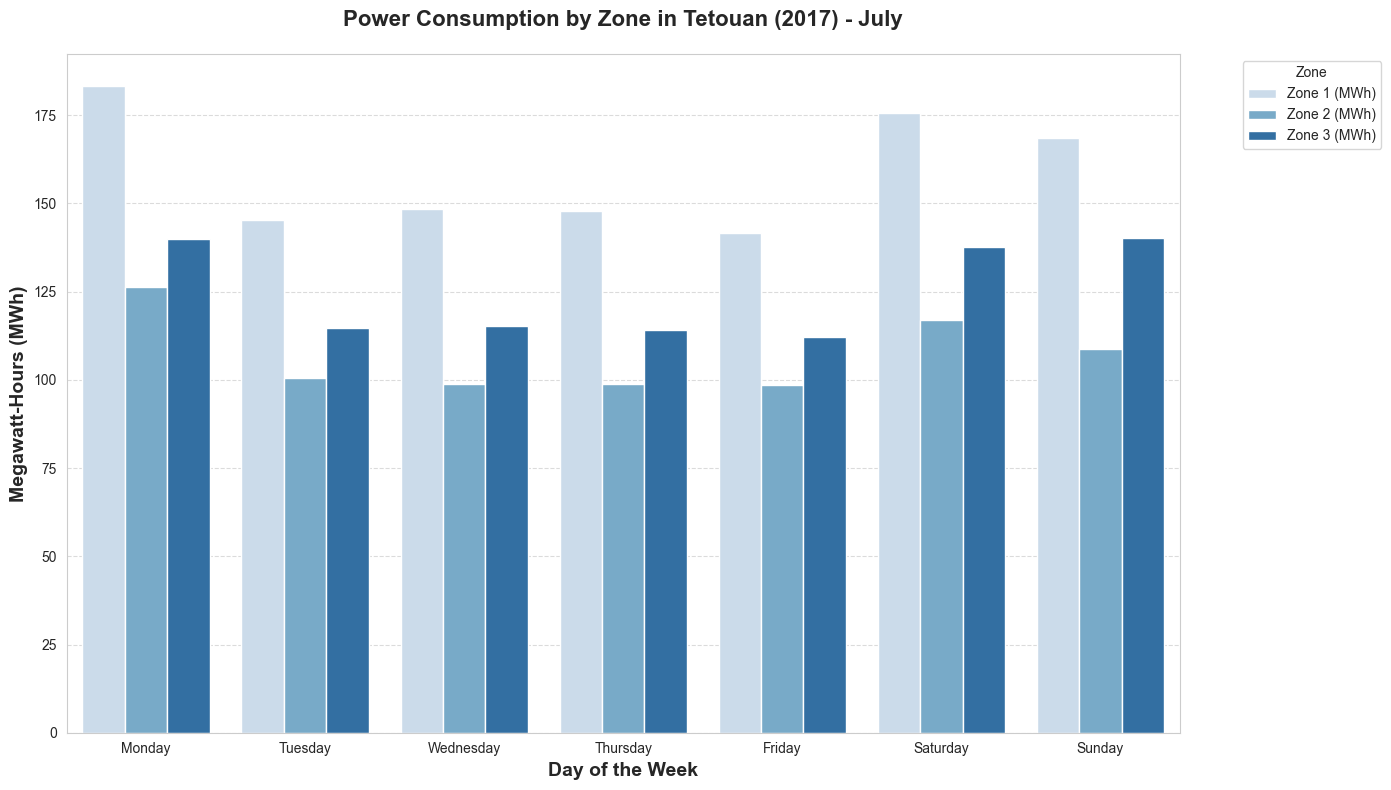

In [136]:
plot_zones_by_month(data_by_weekdays, month=7)

## Plot Electrical Consumption for WeekDays by Zone

In [137]:
def pie_viz_weekday_by_month(data,month,zone):
    month_data = data[data['month'] == month]

    # Extract Zone 1 (MWh) and Day Name for July
    zone_data = month_data[zone]
    
    # Create the pie chart
    plt.figure(figsize=(14, 8))  # Set figure size
    plt.pie(zone_data, labels=month_data['Day Name'], autopct='%1.1f%%', startangle=140)
    
    # Add a title
    plt.title(f'Distribution of {zone} Power Consumption (MWh) in {month_names[month]} by Day of the Week')
    
    # Show the plot
    plt.show()

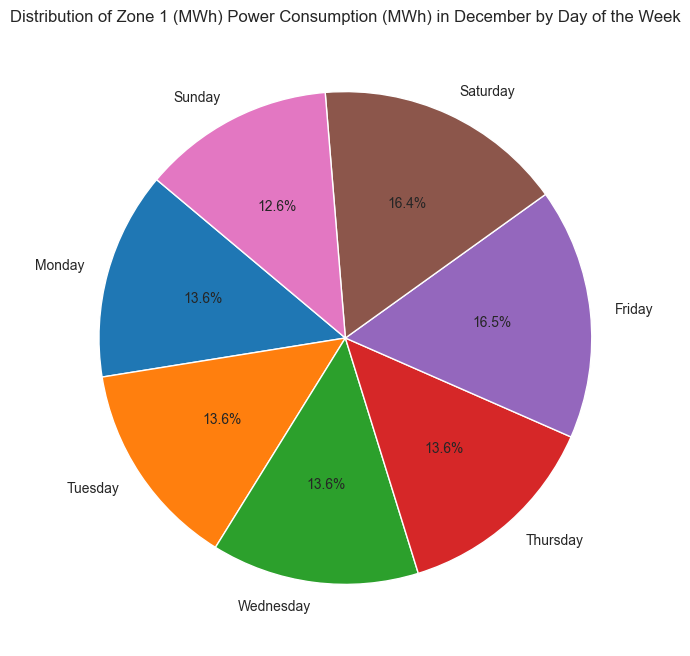

In [138]:
pie_viz_weekday_by_month(data_by_weekdays,12,'Zone 1 (MWh)')

## Electrical Consumption for WeekDays vs WeekEnd 

In [139]:
data_by_weekdays_weekend = daily_consumption.groupby(['month','IsWeekend',])[['Zone 1 (MWh)', 'Zone 2 (MWh)', 'Zone 3 (MWh)']].sum()
data_by_weekdays_weekend = data_by_weekdays_weekend.reset_index()
data_by_weekdays_weekend['IsWeekend'] = data_by_weekdays_weekend['IsWeekend'].map(lambda x: 'WeekEnd' if x == True else 'WeekDays')

In [140]:
data_by_weekdays_weekend.head()

,month,IsWeekend,Zone 1 (MWh),Zone 2 (MWh),Zone 3 (MWh)
0,1,WeekDays,692.354726,435.871733,389.634498
1,1,WeekEnd,269.652574,165.356054,160.494458
2,2,WeekDays,625.519025,384.700481,345.066211
3,2,WeekEnd,242.082076,141.357725,140.313849
4,3,WeekDays,724.145319,435.917302,388.844153
5,3,WeekEnd,241.664809,136.278760,136.534113
6,4,WeekDays,631.290032,365.688315,371.807273
7,4,WeekEnd,303.803014,163.330677,185.987758
8,5,WeekDays,750.763366,469.650955,403.732551
9,5,WeekEnd,253.512918,149.644969,142.521579


In [141]:
def stacked_bar_by_month(data, zone):
    # Pivot the data to get WeekDays and WeekEnd as columns
    pivot_data = data.pivot(index='month', columns='IsWeekend', values=zone)
    
    # Plot the stacked bar chart
    pivot_data.plot(kind='bar', stacked=True, figsize=(12, 6), color=['lightblue', 'darkblue'])
    
    # Add labels and title
    plt.xlabel('Month')
    plt.ylabel(f'{zone}')
    plt.title(f'Stacked Bar Plot of {zone} by Month (WeekDays vs. WeekEnd)')
    plt.legend(title='IsWeekend')
    plt.xticks(rotation=0)  # Keep month labels horizontal
    plt.show()

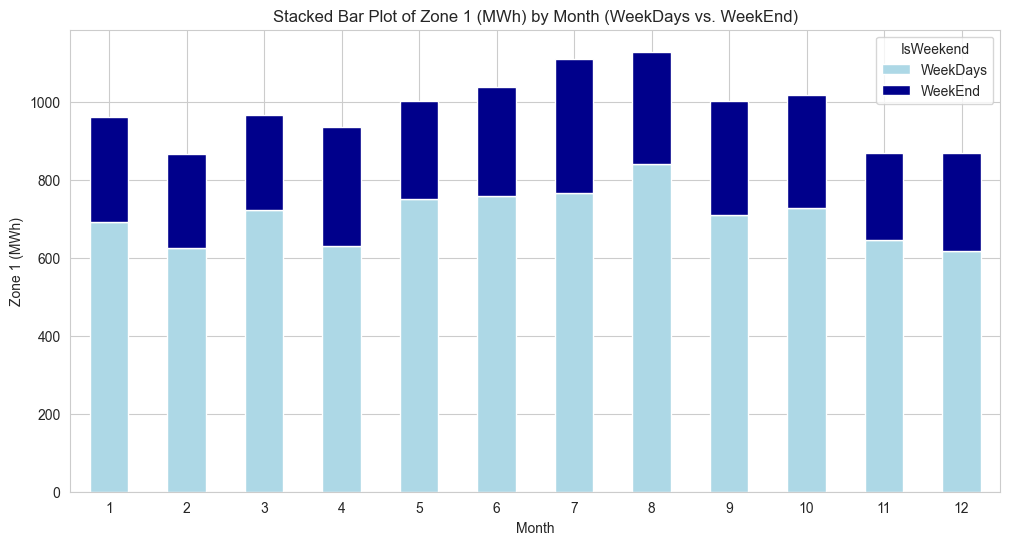

In [142]:
stacked_bar_by_month(data_by_weekdays_weekend, 'Zone 1 (MWh)')

In [143]:
def pie_viz_weekday_weekend_by_month(data,month,zone):
    month_data = data[data['month'] == month]

    # Extract Zone 1 (MWh) and Day Name for July
    zone_data = month_data[zone]
    
    # Create the pie chart
    plt.figure(figsize=(14, 8))  # Set figure size
    plt.pie(zone_data, labels=month_data['IsWeekend'], autopct='%1.1f%%', startangle=140)
    
    # Add a title
    plt.title(f'Distribution of {zone} Power Consumption (MWh) in {month_names[month]} by WeekEnd vs WeekDays')
    
    # Show the plot
    plt.show()

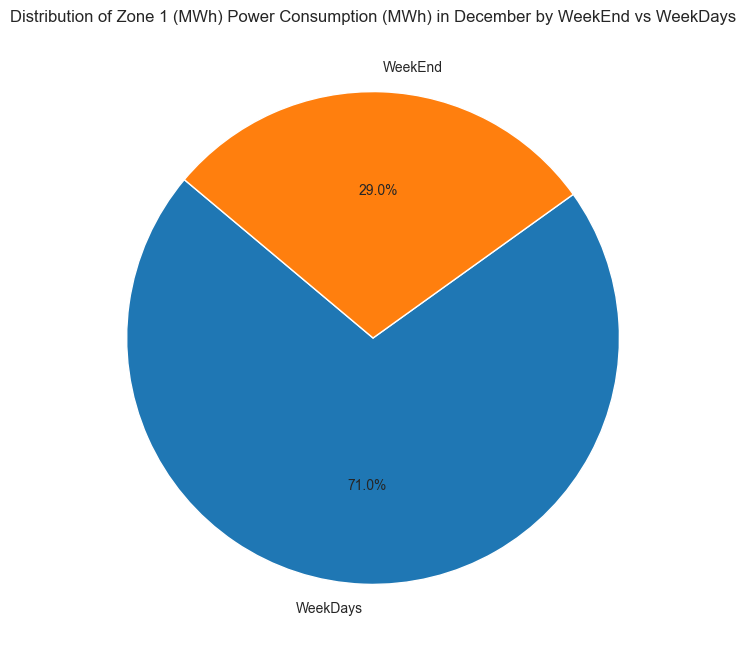

In [144]:
pie_viz_weekday_weekend_by_month(data_by_weekdays_weekend,12,'Zone 1 (MWh)')

## Daily Consumption 

In [145]:
def daily_consumption_by_month(data,month,zone):
    # Filter data for the specified month
    month_data = data[data['month'] == month]
    
    # Create the bar plot
    plt.figure(figsize=(14, 8))
    sns.barplot(
        x='DateTime', 
        y=zone, 
        data=month_data, 
        palette='Blues'
    )
    
    # Add title and labels
    plt.title(
        f'Daily Power Consumption in MWh for {zone} in Tetouan (2017) - {month_names[month]}', 
        fontsize=16, 
        fontweight='bold', 
        pad=20
    )
    plt.xlabel('Date', fontsize=14, fontweight='bold')
    plt.ylabel('Megawatt-Hours (MWh)', fontsize=14, fontweight='bold')
    
    # Format x-axis labels for better readability
    plt.xticks(rotation=60, ha='right')  # Rotate x-axis labels and align them to the right
    
    # Add grid lines for better readability
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    
    # Adjust layout to prevent overlapping
    plt.tight_layout()
    
    # Show the plot
    plt.show()

C:\Users\zakar\AppData\Local\Temp\ipykernel_612\632072021.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


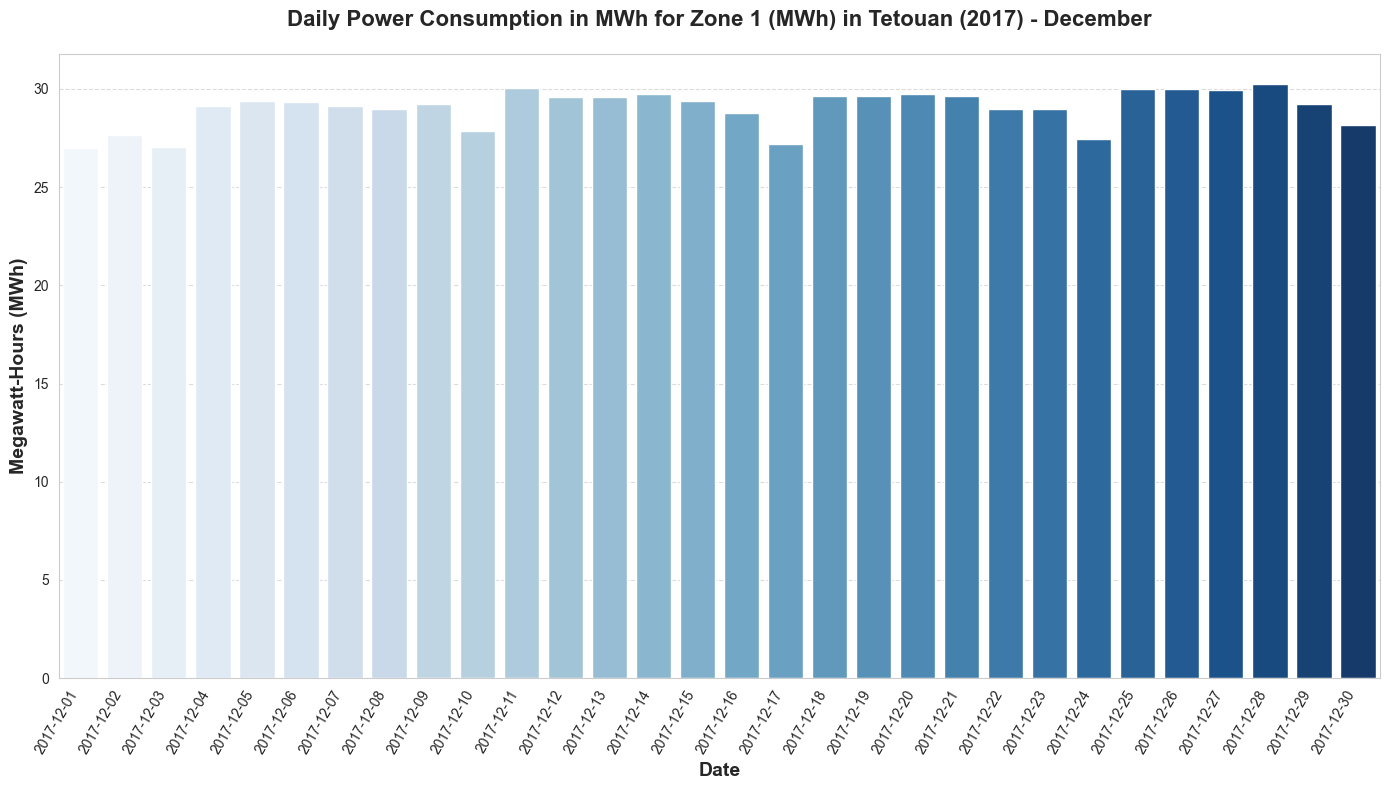

In [146]:
daily_consumption_by_month(daily_consumption,12,'Zone 1 (MWh)')

## Monthly Consumption by Year

In [147]:
def consumption_by_month(data,zone):
    
    # Create the bar plot
    plt.figure(figsize=(14, 8))
    sns.barplot(
        x='Month Name', 
        y=zone, 
        data=data, 
        palette='Blues'
    )
    
    # Add title and labels
    plt.title(
        f'Monthly Power Consumption in MWh for {zone} in Tetouan (2017) ', 
        fontsize=16, 
        fontweight='bold', 
        pad=20
    )
    plt.xlabel('', fontsize=14, fontweight='bold')
    plt.ylabel('Megawatt-Hours (MWh)', fontsize=14, fontweight='bold')
        
    # Add grid lines for better readability
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    
    # Adjust layout to prevent overlapping
    plt.tight_layout()
    
    # Show the plot
    plt.show()

C:\Users\zakar\AppData\Local\Temp\ipykernel_612\3772263292.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


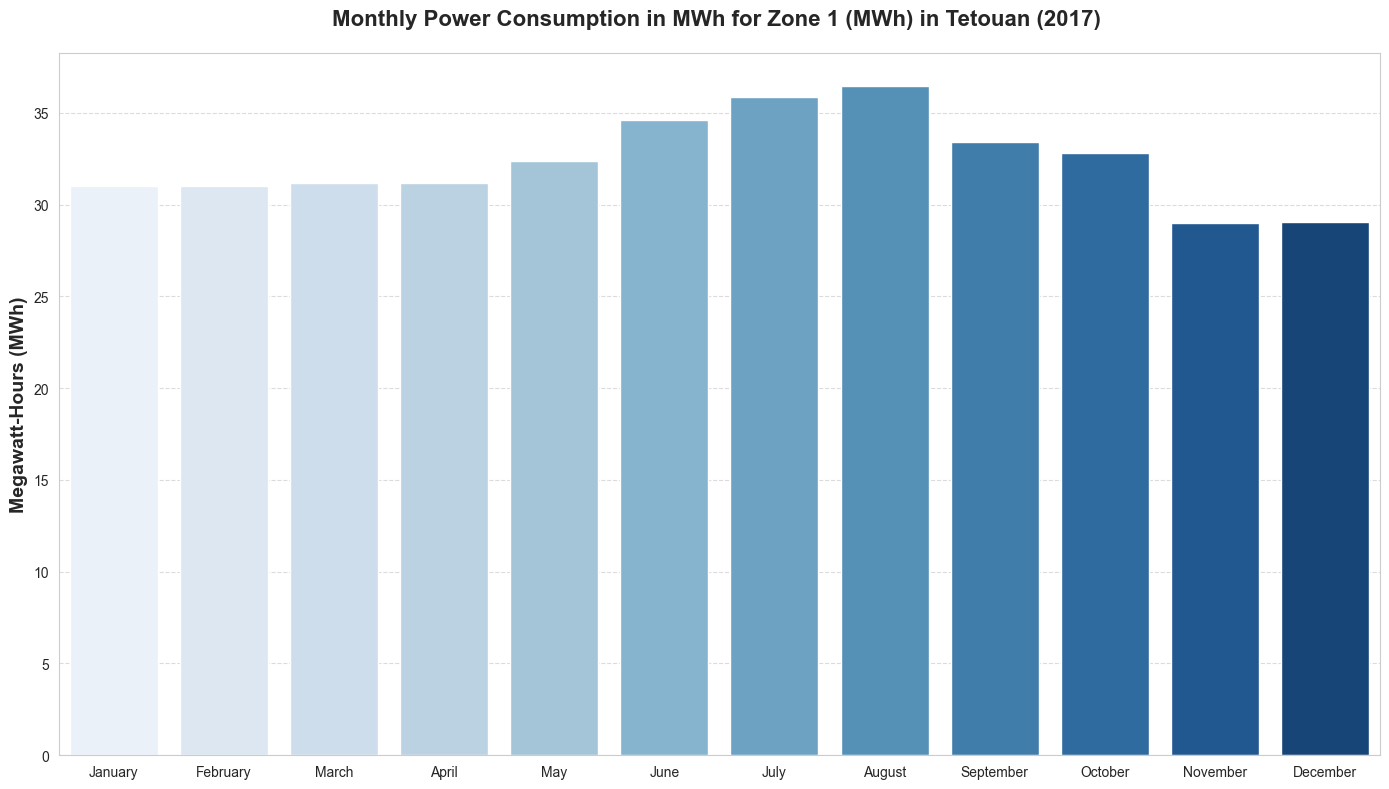

In [148]:
consumption_by_month(monthly_data,'Zone 1 (MWh)')

# Model Setup

## Data Standardization

In [160]:
from sklearn.preprocessing import StandardScaler

In [161]:
scaler = StandardScaler()
scaler.fit(power_consumption)
standard_power_consumption = scaler.transform(power_consumption)

DTypePromotionError: The DType <class 'numpy.dtypes.DateTime64DType'> could not be promoted by <class 'numpy.dtypes.Float64DType'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtypes.DateTime64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>)

In [ ]:
# Select only numeric columns
numeric_columns = power_consumption.select_dtypes(include=['float64', 'int64'])

# Standardize the numeric columns
standard_power_consumption = (numeric_columns - numeric_columns.mean()) / numeric_columns.std()

# Add non-numeric columns back to the standardized DataFrame
standard_power_consumption = pd.concat([power_consumption.select_dtypes(exclude=['float64', 'int64']), standard_power_consumption], axis=1)

print(standard_power_consumption)

## Outliers Detection: IQR Method